In [7]:
!python -m spacy download es_core_news_lg -q
import spacy
nlp=spacy.load("es_core_news_lg")
ruler = nlp.add_pipe("entity_ruler")

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [12]:
import nltk
import pandas as pd
import numpy as np
from IPython.display import display
!pip install --upgrade matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import joblib
from joblib import load 
from joblib import dump
from sklearn.utils import shuffle
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.utils import shuffle

In [105]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)  
    texto = re.sub(r'\d+', '', texto)     
    palabras =word_tokenize(texto)
    doc = nlp(' '.join(palabras))
    palabras = [token.lemma_ for token in doc]
    return ' '.join(palabras)



In [109]:
df=pd.read_csv('Sentimento_completo.csv')
df_actor=df[df['Label']=='ACTOR']
df_actor=df_actor.reset_index(drop=True)

In [113]:
entidades_semanticas = {
    "GENERAL": {"tipo_semantico":"Película","entidades":["Gladiator 2","secuela","continuacion","película"]},
    "DIRECTOR": {"tipo_semantico": "Persona", "entidades": ["Ridley Scott"]},
    "ACTOR": {"tipo_semantico": "Persona", "entidades": ["Paul Mescal", "Denzel Washington", "Pedro Pascal"]},
    "PRODUCCION": {"tipo_semantico": "Objeto Fílmico", "entidades": ["Ridley Scott","producción","visual", "escenas", "efectos especiales","coreografias","música","dirección","ambientación","dirección","secuencias"]},
    "GUION": {"tipo_semantico": "Objeto escrito", "entidades": ["trama","historia","narrativa","guion","desarrollo","profundidad","personajes"]}

In [115]:
patterns = []
for categoria, datos in entidades_semanticas.items():
    for entidad in datos["entidades"]:
        patterns.append({"label": categoria, "pattern": entidad})
ruler.add_patterns(patterns)

In [167]:
model_X= load("modelo_SVC.pkl")
vectorizer=load("vectorizador_tfidf.pkl")

In [169]:
mapeo_sentimientos = {-1: 'NEG', 0: 'NEU',1: 'POS'}

predictions=[]
for index,row in df_actor.iterrows():
    comentarios=row['Review']
    continente=row['continent']
    label=row['Label']
    entity=row['Entity']
    text=limpiar_texto(comentarios)
    text_vec=vectorizer.transform([text])
    pred=model_X.predict(text_vec) 
    sent_map = mapeo_sentimientos[pred[0]]
    text_pred=label,entity,comentarios,continente,sent_map
    predictions.append(text_pred)
pd.set_option('display.max_colwidth', None)   
Df_Actors=pd.DataFrame(predictions,columns=['Label','Entity','Review','Continent','Sentiment'])
Df_Actors.to_csv('Actors.csv')
Df_Actors

,Label,Entity,Review,Continent,Sentiment
0,ACTOR,Paul Mescal,Paul Mescal ofrece una actuación convincente,EEUU,POS
1,ACTOR,Denzel Washington,Denzel Washington destaca con su presencia imponente,EUROPE,POS
2,ACTOR,Pedro Pascal,Pedro Pascal brilla con su interpretación,EEUU,POS
3,ACTOR,Paul Mescal,Paul Mescal hace un gran trabajo,EUROPE,POS
4,ACTOR,Denzel Washington,Denzel Washington entrega una actuación sólida,EEUU,POS
5,ACTOR,Pedro Pascal,Pedro Pascal es un gran acierto en el reparto,EEUU,POS
6,ACTOR,Paul Mescal,Paul Mescal demuestra ser un protagonista fuerte,EEUU,POS
7,ACTOR,Denzel Washington,Denzel Washington y Pedro Pascal hacen un buen trabajo,EEUU,POS
8,ACTOR,Pedro Pascal,Denzel Washington y Pedro Pascal hacen un buen trabajo,EEUU,POS
9,ACTOR,Paul Mescal,A pesar de contar con actores talentosos como Paul Mescal y Denzel Washington,EUROPE,NEG


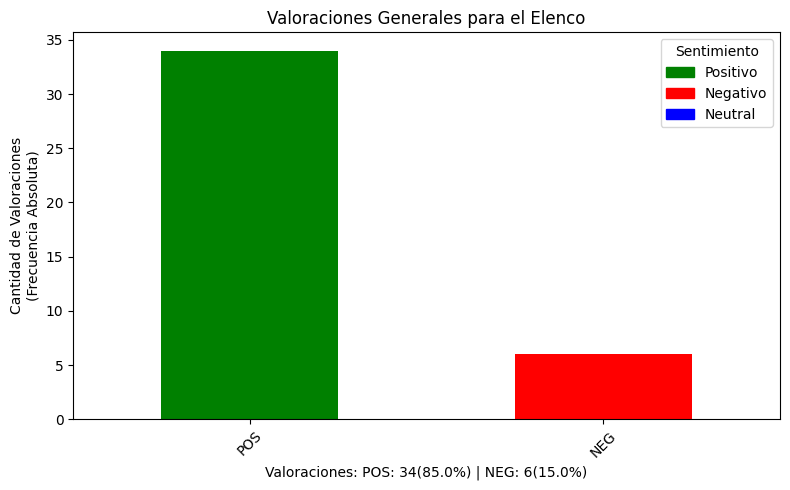

In [171]:
sentiment_elenco = Df_Actors['Sentiment'].value_counts()
frecuency_rel = sentiment_elenco / sentiment_elenco.sum() * 100 
category=['POS', 'NEU', 'NEG']
sentiment_elenco2 = sentiment_elenco.reindex(category, fill_value=0)
colors= {'POS': 'green', 'NEG': 'red', 'NEU': 'blue'}
ax=sentiment_elenco.plot(kind='bar',figsize=(8, 5),color=[colors[label] for label in sentiment_elenco.index])
plt.title('Valoraciones Generales para el Elenco')
sentiment_text = " | ".join([f"{key}: {value}({frecuency_rel[key]:.1f}%)" for key, value in sentiment_elenco.items()])
plt.xlabel(f"Valoraciones: {sentiment_text}")
plt.ylabel('Cantidad de Valoraciones\n(Frecuencia Absoluta)' )
plt.xticks(rotation=45)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in colors.keys()]
labels = ['Positivo', 'Negativo', 'Neutral']  # Describe los colores en la leyenda
plt.legend(handles, labels, title='Sentimiento', loc='upper right')

plt.tight_layout()

plt.show()

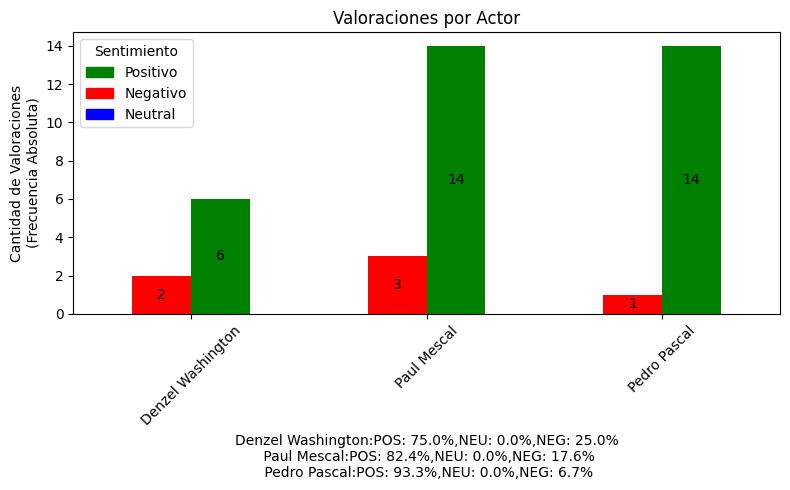

In [173]:
sentiment_actor = Df_Actors.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)
sentiment=(sentiment_actor.to_dict())
category=['POS', 'NEU', 'NEG']
sentiment_actor2 = sentiment_actor.reindex(category, fill_value=0)
frecuencia_rel= sentiment_actor.div(sentiment_actor.sum(axis=1), axis=0) * 100
frecuencia_rel= frecuencia_rel.reindex(columns=category, fill_value=0)
frecuencia_text ="\n ".join([
    f"{actor}:"+",".join([f"{col}: {frecuencia_rel.loc[actor, col]:.1f}%" for col in frecuencia_rel.columns])
    for actor in frecuencia_rel.index
])
ax=sentiment_actor.plot(kind='bar', stacked=False, figsize=(8, 5),color={'POS': 'green', 'NEG': 'red','NEU':'blue'})
plt.title('Valoraciones por Actor')
plt.xlabel(f"{frecuencia_text}")
plt.ylabel('Cantidad de Valoraciones\n(Frecuencia Absoluta)')
plt.xticks(rotation=45)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in colors.keys()]
labels = ['Positivo', 'Negativo', 'Neutral']  # Describe los colores en la leyenda
plt.legend(handles, labels, title='Sentimiento', loc='upper left')
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center') 
plt.show()

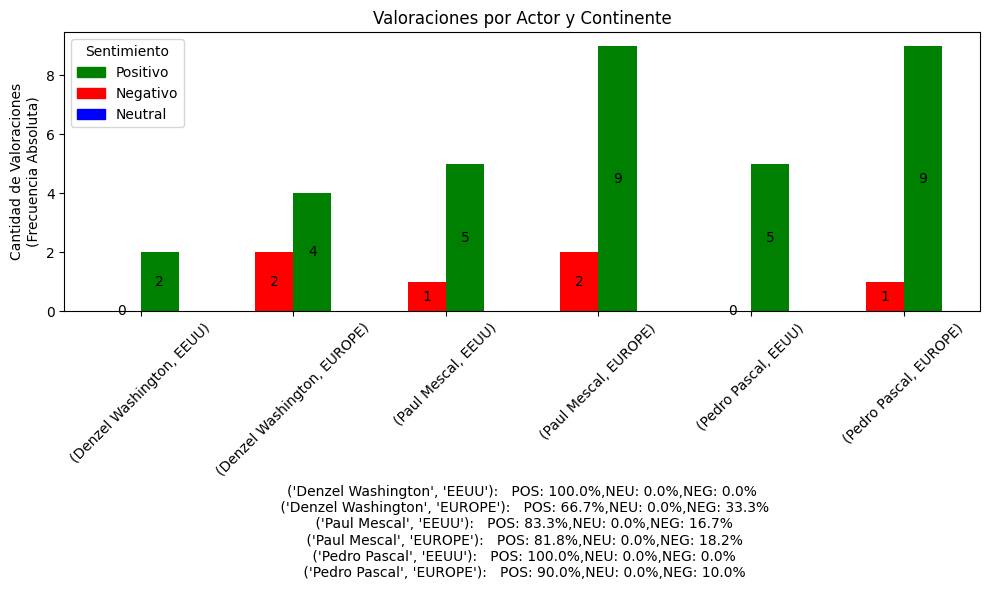

In [175]:
sentiment_continent_counts = Df_Actors.groupby(['Entity', 'Continent', 'Sentiment']).size().unstack(fill_value=0)

# Crear gráfico de barras apiladas
ax=sentiment_continent_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color={'POS': 'green', 'NEG': 'red','NEU':'blue'})
frecuencia_rel= sentiment_continent_counts.div(sentiment_continent_counts.sum(axis=1), axis=0) * 100
frecuencia_rel= frecuencia_rel.reindex(columns=category, fill_value=0)
frecuencia_text ="\n ".join([
    f"{actor}:   "+  ",".join([f"{col}: {frecuencia_rel.loc[actor, col] :.1f}%" for col in frecuencia_rel.columns])
    for actor in frecuencia_rel.index
])
plt.title('Valoraciones por Actor y Continente')
plt.xlabel(f"{frecuencia_text}")
plt.ylabel('Cantidad de Valoraciones\n(Frecuencia Absoluta)')
plt.xticks(rotation=45)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in colors.keys()]
labels = ['Positivo', 'Negativo', 'Neutral']  # Describe los colores en la leyenda
plt.legend(handles, labels, title='Sentimiento', loc='upper left')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center') 
plt.tight_layout()
plt.show()

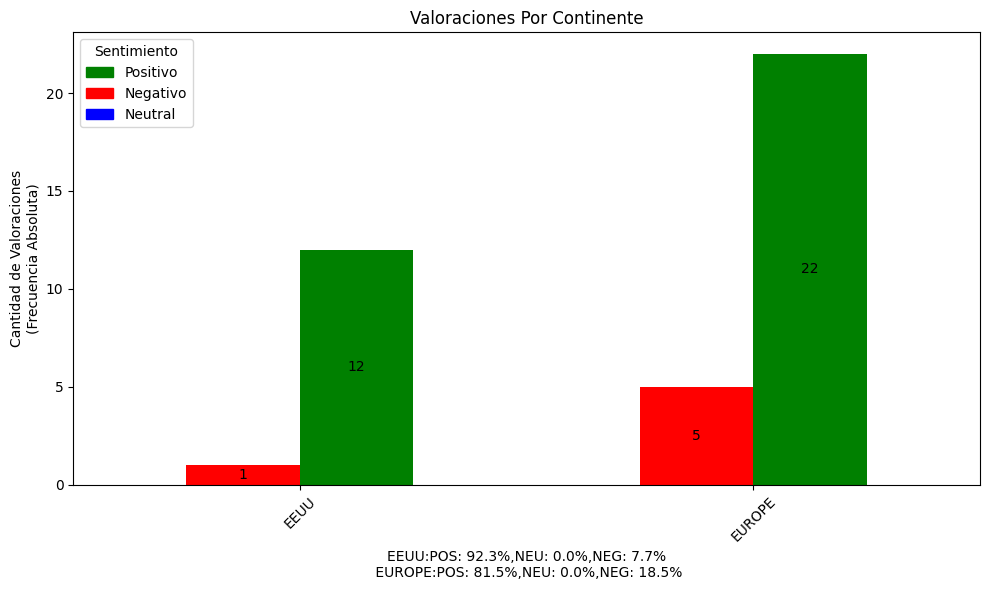

In [177]:
sentiment_continent_counts = Df_Actors.groupby([ 'Continent', 'Sentiment']).size().unstack(fill_value=0)

# Crear gráfico de barras apiladas
ax=sentiment_continent_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color={'POS': 'green', 'NEG': 'red','NEU':'blue'})
frecuencia_rel= sentiment_continent_counts.div(sentiment_continent_counts.sum(axis=1), axis=0) * 100
frecuencia_rel= frecuencia_rel.reindex(columns=category, fill_value=0)
frecuencia_text ="\n ".join([
    f"{actor}:"+",".join([f"{col}: {frecuencia_rel.loc[actor, col]:.1f}%" for col in frecuencia_rel.columns])
    for actor in frecuencia_rel.index
])
plt.title('Valoraciones Por Continente')
plt.xlabel(f"{frecuencia_text}")
plt.ylabel('Cantidad de Valoraciones\n(Frecuencia Absoluta)')
plt.xticks(rotation=45)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in colors.keys()]
labels = ['Positivo', 'Negativo', 'Neutral']  # Describe los colores en la leyenda
plt.legend(handles, labels, title='Sentimiento', loc='upper left')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center') 
plt.tight_layout()
plt.show()